<a href="https://colab.research.google.com/github/victorezealuma/Stock_Portfolio_Optimization/blob/main/Portfolio_Opt_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### The goal of this project is to optimize a porfolio of stocks using Efficient Frontier

In [ ]:
# Geting some information from yahoo finance
!pip install yfinance

### Import & Install Libraries

In [75]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('_classic_test_patch')


### Data Collection:  Accessed yahoo finance API for historical stock data

In [83]:
import pandas as pd

portfolio_tickers = ["BRK-B","PFE","BA","AMT"]

historical_data = yf.download(portfolio_tickers, start="2021-04-01", end=None)["Adj Close"]

df = pd.DataFrame(historical_data)

df


[*********************100%%**********************]  4 of 4 completed


Ticker,AMT,BA,BRK-B,PFE
Date,,,,
2021-04-01,221.828598,252.960007,258.200012,32.232876
2021-04-05,226.162445,259.359985,262.660004,32.215122
2021-04-06,225.081268,255.169998,263.059998,32.010891
2021-04-07,226.125488,252.580002,263.619995,31.886576
2021-04-08,222.798859,254.949997,263.510010,31.930969
...,...,...,...,...
2024-03-25,195.559998,191.410004,409.920013,27.430000
2024-03-26,194.100006,187.500000,411.570007,27.590000
2024-03-27,197.380005,191.949997,416.929993,27.780001


### Visualization of Portfolio Adjusted Price History over time

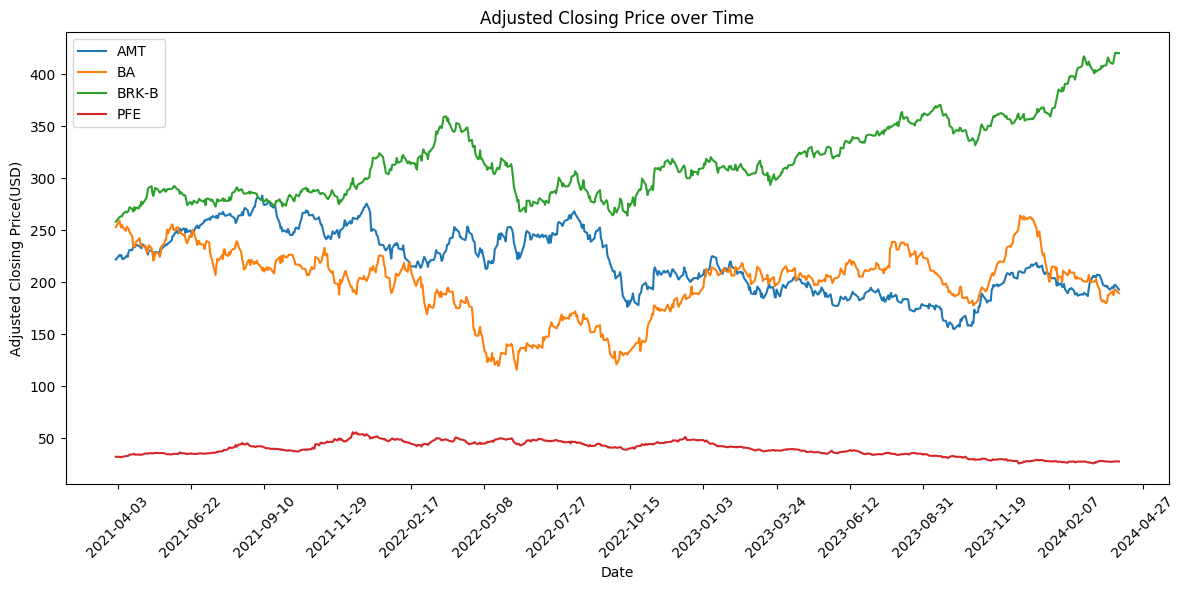

In [89]:
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

my_stocks = df

for c in my_stocks.columns.values:
  plt.plot(my_stocks[c],label=c)       # Creates and plots the graph

plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price(USD)")
plt.title("Adjusted Closing Price over Time")
plt.legend()
plt.grid(False)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(20))  # Adjust the number as needed
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()

plt.show()

In [ ]:
# Calculating the daily return
daily_returns = df.pct_change()
daily_returns

In [90]:
# Create and show the annual covariance of the portfolio
annual_covariance = daily_returns.cov()*252
annual_covariance

Ticker,AMT,BA,BRK-B,PFE
Ticker,,,,
AMT,0.069030,0.025177,0.017676,0.017518
BA,0.025177,0.135767,0.026620,0.008035
BRK-B,0.017676,0.026620,0.029469,0.014348
PFE,0.017518,0.008035,0.014348,0.067205


In [92]:
# Calculating the portfolio variance

portfolio_variance = daily_returns.var() * 252
portfolio_variance

Ticker
AMT      0.069030
BA       0.135767
BRK-B    0.029469
PFE      0.067205
dtype: float64

In [97]:
# Calculate the portfolio volatility aka standard deviation

annualized_volatility = daily_returns.std() * np.sqrt(252)
print("Annual Volatility:", annualized_volatility)


Annual Volatility: Ticker
AMT      0.262735
BA       0.368466
BRK-B    0.171665
PFE      0.259240
dtype: float64
